# Linear Regression Project

Import libraries and read the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


In [3]:
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
total_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Seperating types of features by dtype

In [5]:
num_col = ["age", "bmi", "children", "charges"]
cat_col = ["sex","smoker","region"]

Begin in-depth EDA for numerical columns

EDA for the columns age
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Are there missing values for age?
0
EDA for the columns bmi
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
Are there missing values for bmi?
0
EDA for the columns children
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
Are there missing values for children?
0
EDA for the columns charges
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtyp

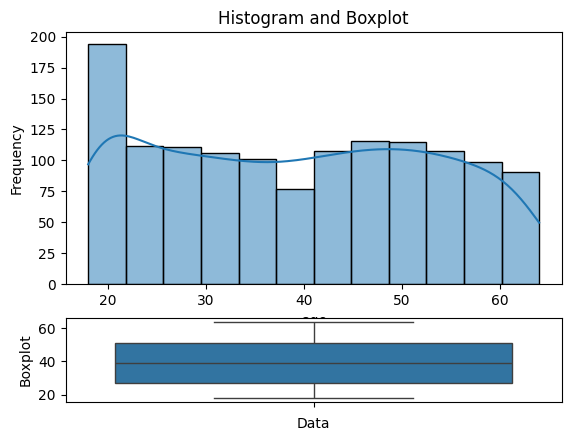

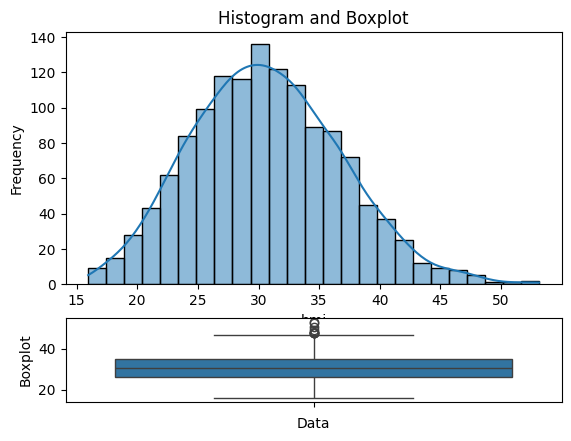

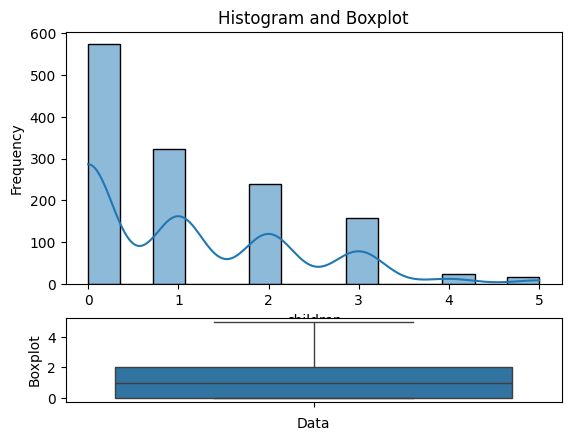

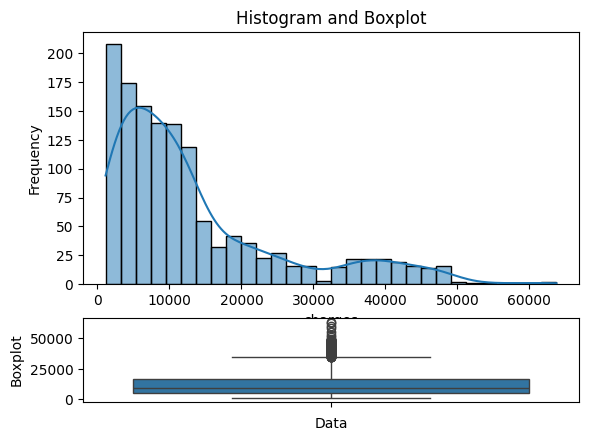

In [6]:
for col in range(len(num_col)):
    print(f"EDA for the columns {num_col[col]}")
    print(total_data[num_col[col]].describe())
    print(f"Are there missing values for {num_col[col]}?")
    print(total_data[num_col[col]].isna().sum())
    
    fig, (ax1, ax2) = plt.subplots(2,1, sharex= False, gridspec_kw={'height_ratios': [3,1]})

    sns.histplot(total_data[num_col[col]],kde=True,ax=ax1)
    ax1.set_title('Histogram and Boxplot')
    ax1.set_ylabel('Frequency')

    sns.boxplot(total_data[num_col[col]],ax=ax2)
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Boxplot')

Begin in-depth EDA for categorical features

<Axes: xlabel='sex', ylabel='Count'>

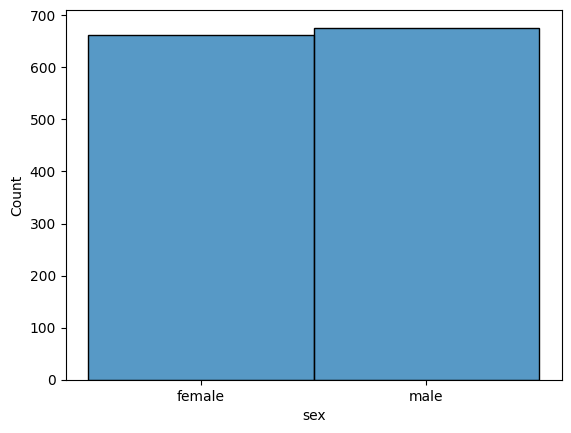

In [7]:
fig, axis = plt.subplots(1,1, sharex= False)

sns.histplot(total_data['sex'])


<Axes: xlabel='smoker', ylabel='Count'>

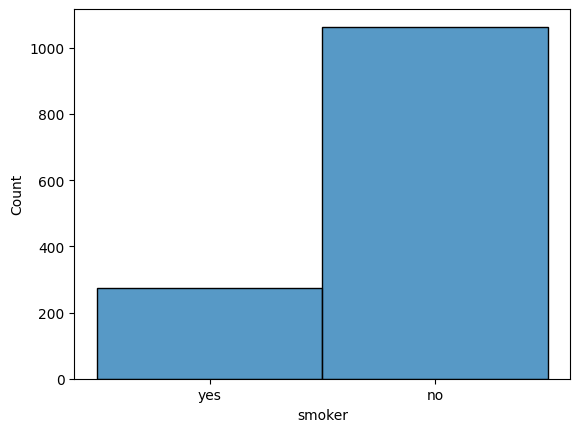

In [8]:
fig, axis = plt.subplots(1,1)

sns.histplot(total_data['smoker'])


In [9]:
pd.crosstab(total_data["sex"], [total_data["smoker"], total_data["region"]])

smoker        no                                     yes                      \
region northeast northwest southeast southwest northeast northwest southeast   
sex                                                                            
female       132       135       139       141        29        29        36   
male         125       132       134       126        38        29        55   

smoker            
region southwest  
sex               
female        21  
male          37

# Basic model for predictions

Goal is to perdict charges as a relationship to other features

In [10]:
y = total_data["charges"].values
X_num = total_data[["age", "bmi", "children"]]
X_cat = total_data[["sex", "smoker", "region"]]

In [11]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(X_cat)
X_dummies = encoder.transform(X_cat)
X_full = np.c_[X_num,X_dummies]

Scale the data

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

Split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12345)

Model 1

In [14]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio1 = mean_squared_error(y_pred_train, y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio1)


37187839.68024029
34192646.55988488
1.0875975808163791


Model 2

In [15]:
log_y = np.log(y)
poly = PolynomialFeatures(10, include_bias=False)
X_poly = poly.fit_transform(X_full)
X_scaled = scaler.fit_transform(X_poly)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, log_y, test_size=0.2, random_state=12345)

In [16]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio2 = mean_squared_error(y_pred_train, y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio2)


0.002177910618250849
1645433126539014.2
1.3236093178893523e-18


Model 3

In [17]:
model3 = Lasso(alpha = 0.1, max_iter= 300)
model3.fit(X_train, y_train)
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))
ratio3 = mean_squared_error(y_pred_train, y_train)/mean_squared_error(y_pred_test,y_test)
print(ratio3)


0.21782678035009548
0.21296802482915508
1.0228144836523612


Cross Validation

In [18]:
alpha_ranges = np.logspace(0.01,5,50)

In [19]:
mse_in = []
mse_out = []
ratio = []
for index, alpha in enumerate(alpha_ranges):
    print(f"Index {index}: {len(alpha_ranges)} - alpha {alpha}")
    model3 = Lasso(alpha = alpha, max_iter= 300)
    model3.fit(X_train, y_train)
    y_pred_train = model3.predict(X_train)
    y_pred_test = model3.predict(X_test)
    mse_in.append(mean_squared_error(y_pred_train,y_train))
    mse_out.append(mean_squared_error(y_pred_test,y_test))
    ratio.append(mean_squared_error(y_pred_train, y_train)/mean_squared_error(y_pred_test,y_test))
    

Index 0: 50 - alpha 1.023292992280754
Index 1: 50 - alpha 1.293709402922019
Index 2: 50 - alpha 1.6355863196898057
Index 3: 50 - alpha 2.0678079660813076
Index 4: 50 - alpha 2.614248929032519
Index 5: 50 - alpha 3.305092917259292
Index 6: 50 - alpha 4.178500015972143
Index 7: 50 - alpha 5.2827145319586295
Index 8: 50 - alpha 6.678729859876331
Index 9: 50 - alpha 8.443657568728348
Index 10: 50 - alpha 10.674986806438026
Index 11: 50 - alpha 13.495969298857782
Index 12: 50 - alpha 17.062427393902112
Index 13: 50 - alpha 21.571361206106218
Index 14: 50 - alpha 27.271830293654745
Index 15: 50 - alpha 34.47871093806403
Index 16: 50 - alpha 43.5900889360978
Index 17: 50 - alpha 55.109248627947856
Index 18: 50 - alpha 69.67247276758707
Index 19: 50 - alpha 88.08418881415119
Index 20: 50 - alpha 111.36140301678202
Index 21: 50 - alpha 140.7898766943497
Index 22: 50 - alpha 177.99514771399788
Index 23: 50 - alpha 225.03232017532858
Index 24: 50 - alpha 284.4995820046686
Index 25: 50 - alpha 359

In [20]:
lasso_model = Lasso(alpha=0.1, max_iter=300)
y_pred_cv = cross_val_predict(lasso_model,X_train,y_train,cv=5)
lasso_model.fit(X_train,y_train)
y_pred_test = lasso_model.predict(X_test)
test_mse = mean_squared_error(y_test,y_pred_test)

print("Mean Squared Error on Test Set:", test_mse)

Mean Squared Error on Test Set: 0.21296802482915508
